**Round 1**
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [68]:
# Import the required libraries and modules that you would need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [69]:
# Read that data into Python and call the dataframe churnData.
data = pd.read_csv("DATA_Customer-Churn.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [70]:
# Check the datatypes of all the columns in the data. 
# You would see that the column TotalCharges is object type. 
# Convert this column into numeric type using pd.to_numeric function.

result = data.dtypes
print(result)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [71]:
#data.isnull().values.any()

data['TotalCharges'].replace(' ', np.nan, inplace=True) #Replace empty rows with NA
data
#data.dropna(subset=['TotalCharges'], inplace=True)
#data['TotalCharges'].isnull().sum()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [72]:
data.dropna(subset=['TotalCharges'], inplace=True) #drop NA

In [73]:
data[["TotalCharges"]] = data[["TotalCharges"]].apply(pd.to_numeric) #Convert TotalCharges column into numeric.

In [74]:
result = data.dtypes
print(result)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [75]:
# Check for null values in the dataframe. Replace the null values.
data.isnull().values.any()

False

-Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:  
-Split the data into a training set and a test set.  
-Scale the features either by using normalizer or a standard scaler.  
-(optional)Fit a logistic Regression model on the training data.  
-Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.  

In [76]:
#Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.select_dtypes(include=numerics)
data_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [77]:
#X, y split
y=data['Churn']
X=data_num
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [78]:
y=pd.get_dummies(y, drop_first=True)
y

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [79]:
# Split the data into a training set and a test set.
TT_SPLIT = 0.2     # ratio train/test size #proportion test set split
RAND_STATE = 123   # specifies a sampling for repeatable results

In [80]:
#train/test, create df
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [81]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [88]:
# -Scale the features either by using normalizer or a standard scaler.
scaler = StandardScaler()

# fit the scaler on the training features
scaler.fit(X_train)

# transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_train_scaled

array([[ 2.29280443, -1.28726837,  0.2846762 , -0.98313335],
       [-0.4361471 ,  0.01727799,  1.00646246,  0.42603646],
       [-0.4361471 , -0.63499519, -1.50562042, -0.87883762],
       ...,
       [-0.4361471 , -0.87959763, -1.48895099, -0.90515914],
       [-0.4361471 ,  0.6287841 ,  1.16482203,  1.11217869],
       [-0.4361471 , -0.96113178,  0.13131746, -0.72770895]])

In [92]:
# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model #we fit our model with X_train and y_train
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)
#how well the model does on the train set and on the test set

<ipython-input-92-1600ed40df71>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train) # train model #we fit our model with X_train and y_train


In [93]:
y_pred [0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

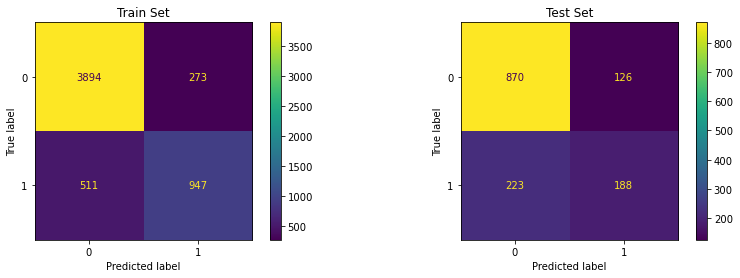

In [94]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

TP:947, TN:3894, FN:511, FP:273

C:\Users\oksan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.68
2,Recall,0.44,0.44


Confusion matrix for the train set
[[3815  339]
 [ 818  653]]


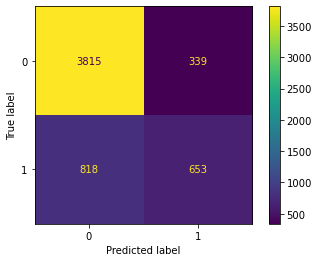



Confusion matrix for the test set
[[925  84]
 [223 175]]


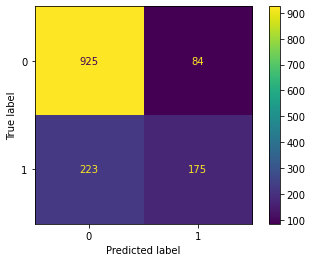

In [101]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()